In [1]:
from ramp_systems.cyclic_feedback_system import CyclicFeedbackSystem
import numpy as np
import DSGRN
import sympy
import matplotlib.pyplot as plt

### A couple functions to facilitate plotting the distance of the singular equilibrium from the singular cell's walls. 

In [2]:
def sing_eq_distance_from_theta(sing_eq_func,eps_func,s_val,CFS):
    """
    Compute the distance of the singular equilibrium from the intersection of thresholds. 
    Raises a ValueError if the singular equilibrium isn't in the singular equilibrium cell. 
    
    :param sing_eq_func: output of CFS.singular_equilibrium(eps_func = eps_func)
    :param eps_func: sympy expression with symbol s
    :param s_val: value of s at which to compute the distance
    :param CFS: CyclicFeedbackSystem object
    :return: float describing the minimum distance from the singular equilibrium to a cell wall. 
    """
    x_val = sing_eq_func(s_val)
    s = sympy.symbols('s')
    eps_val = eps_func.subs(s,s_val)
    distances = []
    theta = CFS.theta
    rho = CFS.rho
    for i in range(len(x_val)):
        cur_distance = ((x_val[i,0] - theta[rho[i],i])/(2*eps_val[rho[i],i]))**2
        if x_val[i,0] > theta[rho[i],i] + eps_val[rho[i],i] or x_val[i,0] < theta[rho[i],i] - eps_val[rho[i],i]:
            raise ValueError('Singular equilibrium does not exist when s_val = {}'.format(s_val))
        distances.append(cur_distance)
    return sum(distances)**(1/2)

In [3]:
def plot_distances(sing_eq_func,eps_func,s_vals,CFS):
    """
    Plot the output of sing_eq_distance_from_walls for a range of s values. 
    
    :param sing_eq_func: output of CFS.singular_equilibrium(eps_func = eps_func)
    :param eps_func: sympy expression with symbol s
    :param s_vals: list of values of s at which to compute the distances
    :param CFS: CyclicFeedbackSystem object
    :return: tuple of matplotlib objects (fig,ax)
    """
    fig, ax = plt.subplots()
    distances = []
    eps = []
    s = sympy.symbols('s')
    for s_val in s_vals:
        distances.append(sing_eq_distance_from_theta(sing_eq_func,eps_func,s_val,CFS))
    ax.set_ylim(0,1.1)
    ax.plot(s_vals,distances)
    return fig, ax

### Create a CyclicFeedbackSystem object.

In [4]:
Network = DSGRN.Network("X0: ~X1 \n X1: X0")
L = np.array([[0,1],[1,0]])
Delta = np.array([[0,1],[1,0]])
theta = np.array([[0,1.1],[1.9,0]])
gamma = np.array([1,1])
CFS = CyclicFeedbackSystem(Network,L,Delta,theta,gamma)

### Parameterize eps and get the singular equilibrium function.

In [5]:
s = sympy.symbols('s')
eps_func = sympy.Matrix([[0,1],[1,0]])*s
eq = CFS.singular_equilibrium(eps_func = eps_func)

### Plot the normalized distances. 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

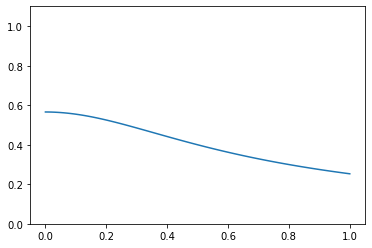

In [6]:
s_vals = np.linspace(0.001,1,100)
plot_distances(eq,eps_func,s_vals,CFS)